# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print (cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [16]:
import json
import requests


In [60]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
params = {
    "appid": api_key,
    "units": "imperial",
    params["q"]:city
}

i= 1
j= 1
# Loop through the list of cities and perform a request for data on each
weather_data = []
for city in cities:
    params["q"]= city
    response = requests.get(base_url, params=params)
    response_json = response.json()
    #print(response.url)
   
   
    try:
        data = {
            "city": city,
            #"id":  response_json["coord"]["id"],
            "country":response_json["sys"]["country"],
            "lat": response_json["coord"]["lat"],
            "lon": response_json["coord"]["lon"],
            "name": response_json["name"],
            "temp": response_json["main"]["temp_max"],
            "humidity": response_json["main"]["humidity"],
            "wind": response_json["wind"]["speed"],
            "cloudiness": response_json["clouds"]["all"],
            "date": response_json["dt"]        
        }

    except KeyError as e:
        print(f"City not found... skipping" )
    
    print(f"Processing Record {i} of Set {j} | {city}")  

    print(data)
    weather_data.append(data)
    
    if i == 50: 
        i=0
        if j== 10:
            break
        else:
            j+=1
    else:
        i+=1
        
#weather_data
weather_df = pd.DataFrame(weather_data)
weather_df.head()



http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=carahue
Processing Record 1 of Set 1 | carahue
{'city': 'carahue', 'country': 'CL', 'lat': -38.71, 'lon': -73.16, 'name': 'Carahue', 'temp': 53.6, 'humidity': 32, 'wind': 10.29, 'cloudiness': 0, 'date': 1567465148}
http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=broome
Processing Record 2 of Set 1 | broome
{'city': 'broome', 'country': 'GB', 'lat': 52.47, 'lon': 1.45, 'name': 'Broome', 'temp': 63, 'humidity': 67, 'wind': 11.41, 'cloudiness': 80, 'date': 1567465175}
http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=maravatio
Processing Record 3 of Set 1 | maravatio
{'city': 'maravatio', 'country': 'MX', 'lat': 19.89, 'lon': -100.44, 'name': 'Maravatio', 'temp': 78.8, 'humidity': 41, 'wind': 9.17, 'cloudiness': 40, 'date': 1567465175

http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=siavonga
Processing Record 25 of Set 1 | siavonga
{'city': 'siavonga', 'country': 'ZW', 'lat': -16.54, 'lon': 28.71, 'name': 'Siavonga', 'temp': 73.16, 'humidity': 63, 'wind': 10.87, 'cloudiness': 4, 'date': 1567465180}
http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=nikolskoye
Processing Record 26 of Set 1 | nikolskoye
{'city': 'nikolskoye', 'country': 'RU', 'lat': 59.7, 'lon': 30.79, 'name': 'Nikolskoye', 'temp': 64, 'humidity': 82, 'wind': 4.47, 'cloudiness': 0, 'date': 1567465180}
http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=cabo+san+lucas
Processing Record 27 of Set 1 | cabo san lucas
{'city': 'cabo san lucas', 'country': 'MX', 'lat': 22.89, 'lon': -109.91, 'name': 'Cabo San Lucas', 'temp': 90, 'humidity': 62, 'wind': 11.

http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=ashland
Processing Record 49 of Set 1 | ashland
{'city': 'ashland', 'country': 'US', 'lat': 38.48, 'lon': -82.64, 'name': 'Ashland', 'temp': 82.4, 'humidity': 69, 'wind': 4.7, 'cloudiness': 1, 'date': 1567465185}
http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=iralaya
Processing Record 50 of Set 1 | iralaya
{'city': 'iralaya', 'country': 'HN', 'lat': 15, 'lon': -83.23, 'name': 'Iralaya', 'temp': 89.6, 'humidity': 66, 'wind': 5.82, 'cloudiness': 20, 'date': 1567465185}
http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=mataura
Processing Record 0 of Set 2 | mataura
{'city': 'mataura', 'country': 'NZ', 'lat': -46.19, 'lon': 168.86, 'name': 'Mataura', 'temp': 51.01, 'humidity': 75, 'wind': 3, 'cloudiness': 39, 'date': 1567465185}
http:

http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=mehamn
Processing Record 22 of Set 2 | mehamn
{'city': 'mehamn', 'country': 'NO', 'lat': 71.03, 'lon': 27.85, 'name': 'Mehamn', 'temp': 50, 'humidity': 100, 'wind': 5.82, 'cloudiness': 90, 'date': 1567465190}
http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=tumannyy
City not found... skipping
Processing Record 23 of Set 2 | tumannyy
{'city': 'mehamn', 'country': 'NO', 'lat': 71.03, 'lon': 27.85, 'name': 'Mehamn', 'temp': 50, 'humidity': 100, 'wind': 5.82, 'cloudiness': 90, 'date': 1567465190}
http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=port+alfred
Processing Record 24 of Set 2 | port alfred
{'city': 'port alfred', 'country': 'ZA', 'lat': -33.59, 'lon': 26.89, 'name': 'Port Alfred', 'temp': 57, 'humidity': 91, 'wind': 3, 'cloud

http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=fortuna
Processing Record 47 of Set 2 | fortuna
{'city': 'fortuna', 'country': 'US', 'lat': 40.6, 'lon': -124.16, 'name': 'Fortuna', 'temp': 69.8, 'humidity': 68, 'wind': 16.11, 'cloudiness': 1, 'date': 1567465196}
http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=chagda
City not found... skipping
Processing Record 48 of Set 2 | chagda
{'city': 'fortuna', 'country': 'US', 'lat': 40.6, 'lon': -124.16, 'name': 'Fortuna', 'temp': 69.8, 'humidity': 68, 'wind': 16.11, 'cloudiness': 1, 'date': 1567465196}
http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=khatanga
Processing Record 49 of Set 2 | khatanga
{'city': 'khatanga', 'country': 'RU', 'lat': 71.98, 'lon': 102.47, 'name': 'Khatanga', 'temp': 46.7, 'humidity': 62, 'wind': 6.31, 'cloudi

http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=juxtlahuaca
Processing Record 20 of Set 3 | juxtlahuaca
{'city': 'juxtlahuaca', 'country': 'MX', 'lat': 17.43, 'lon': -99.15, 'name': 'Juxtlahuaca', 'temp': 67.94, 'humidity': 93, 'wind': 3.29, 'cloudiness': 92, 'date': 1567465215}
http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=antofagasta
Processing Record 21 of Set 3 | antofagasta
{'city': 'antofagasta', 'country': 'CL', 'lat': -23.65, 'lon': -70.4, 'name': 'Antofagasta', 'temp': 57.2, 'humidity': 76, 'wind': 11.41, 'cloudiness': 20, 'date': 1567465217}
http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=esso
Processing Record 22 of Set 3 | esso
{'city': 'esso', 'country': 'RU', 'lat': 55.93, 'lon': 158.7, 'name': 'Esso', 'temp': 49.94, 'humidity': 72, 'wind': 7.52, 'cloudiness': 

http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=ust-tarka
Processing Record 45 of Set 3 | ust-tarka
{'city': 'ust-tarka', 'country': 'RU', 'lat': 55.56, 'lon': 75.71, 'name': 'Ust-Tarka', 'temp': 42.02, 'humidity': 96, 'wind': 2.3, 'cloudiness': 48, 'date': 1567465225}
http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=tabas
Processing Record 46 of Set 3 | tabas
{'city': 'tabas', 'country': 'IR', 'lat': 33.6, 'lon': 56.92, 'name': 'Tabas', 'temp': 84.2, 'humidity': 18, 'wind': 4.7, 'cloudiness': 0, 'date': 1567465225}
http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=bubaque
Processing Record 47 of Set 3 | bubaque
{'city': 'bubaque', 'country': 'GW', 'lat': 11.28, 'lon': -15.83, 'name': 'Bubaque', 'temp': 80.54, 'humidity': 85, 'wind': 14.7, 'cloudiness': 17, 'date': 1567465225}
ht

http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=antalaha
Processing Record 19 of Set 4 | antalaha
{'city': 'antalaha', 'country': 'MG', 'lat': -14.9, 'lon': 50.28, 'name': 'Antalaha', 'temp': 61.28, 'humidity': 97, 'wind': 3.67, 'cloudiness': 18, 'date': 1567465231}
http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=neuquen
Processing Record 20 of Set 4 | neuquen
{'city': 'neuquen', 'country': 'AR', 'lat': -38.95, 'lon': -68.06, 'name': 'Neuquen', 'temp': 48.2, 'humidity': 24, 'wind': 5.82, 'cloudiness': 0, 'date': 1567465060}
http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=gasa
Processing Record 21 of Set 4 | gasa
{'city': 'gasa', 'country': 'BT', 'lat': 27.91, 'lon': 89.73, 'name': 'Gasa', 'temp': 38.6, 'humidity': 93, 'wind': 2.84, 'cloudiness': 100, 'date': 1567465231}
http:/

http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=nanortalik
Processing Record 44 of Set 4 | nanortalik
{'city': 'nanortalik', 'country': 'GL', 'lat': 60.14, 'lon': -45.24, 'name': 'Nanortalik', 'temp': 42.2, 'humidity': 88, 'wind': 5.68, 'cloudiness': 95, 'date': 1567465237}
http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=solnechnyy
Processing Record 45 of Set 4 | solnechnyy
{'city': 'solnechnyy', 'country': 'RU', 'lat': 50.72, 'lon': 136.64, 'name': 'Solnechnyy', 'temp': 63.8, 'humidity': 60, 'wind': 1.48, 'cloudiness': 87, 'date': 1567465237}
http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=aykhal
Processing Record 46 of Set 4 | aykhal
{'city': 'aykhal', 'country': 'RU', 'lat': 65.95, 'lon': 111.51, 'name': 'Aykhal', 'temp': 33.8, 'humidity': 70, 'wind': 6.71, 'cloudiness': 75

http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=xining
Processing Record 17 of Set 5 | xining
{'city': 'xining', 'country': 'CN', 'lat': 36.62, 'lon': 101.77, 'name': 'Xining', 'temp': 51.92, 'humidity': 80, 'wind': 3.11, 'cloudiness': 69, 'date': 1567465242}
http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=fairbanks
Processing Record 18 of Set 5 | fairbanks
{'city': 'fairbanks', 'country': 'US', 'lat': 64.84, 'lon': -147.72, 'name': 'Fairbanks', 'temp': 71.6, 'humidity': 35, 'wind': 4.7, 'cloudiness': 75, 'date': 1567465242}
http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=russell
Processing Record 19 of Set 5 | russell
{'city': 'russell', 'country': 'US', 'lat': 38.9, 'lon': -98.86, 'name': 'Russell', 'temp': 93.2, 'humidity': 46, 'wind': 18.34, 'cloudiness': 1, 'date': 156746

http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=magadan
Processing Record 42 of Set 5 | magadan
{'city': 'magadan', 'country': 'RU', 'lat': 59.56, 'lon': 150.8, 'name': 'Magadan', 'temp': 51.56, 'humidity': 88, 'wind': 6.85, 'cloudiness': 100, 'date': 1567465248}
http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=hosbach
Processing Record 43 of Set 5 | hosbach
{'city': 'hosbach', 'country': 'DE', 'lat': 50, 'lon': 9.2, 'name': 'Hosbach', 'temp': 57.2, 'humidity': 71, 'wind': 1.12, 'cloudiness': 0, 'date': 1567465248}
http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=anaconda
Processing Record 44 of Set 5 | anaconda
{'city': 'anaconda', 'country': 'US', 'lat': 46.13, 'lon': -112.94, 'name': 'Anaconda', 'temp': 84.2, 'humidity': 17, 'wind': 14.99, 'cloudiness': 1, 'date': 1567465248}

http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=salalah
Processing Record 15 of Set 6 | salalah
{'city': 'salalah', 'country': 'OM', 'lat': 17.01, 'lon': 54.1, 'name': 'Salalah', 'temp': 78.8, 'humidity': 94, 'wind': 3.36, 'cloudiness': 90, 'date': 1567465253}
http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=maine-soroa
Processing Record 16 of Set 6 | maine-soroa
{'city': 'maine-soroa', 'country': 'NE', 'lat': 13.21, 'lon': 12.02, 'name': 'Maine-Soroa', 'temp': 81.26, 'humidity': 60, 'wind': 7.47, 'cloudiness': 87, 'date': 1567465253}
http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=ipojuca
Processing Record 17 of Set 6 | ipojuca
{'city': 'ipojuca', 'country': 'BR', 'lat': -8.4, 'lon': -35.06, 'name': 'Ipojuca', 'temp': 78.8, 'humidity': 74, 'wind': 8.05, 'cloudiness': 40, 'date

http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=porto+velho
Processing Record 40 of Set 6 | porto velho
{'city': 'porto velho', 'country': 'BR', 'lat': -8.75, 'lon': -63.87, 'name': 'Porto Velho', 'temp': 77, 'humidity': 94, 'wind': 2.24, 'cloudiness': 75, 'date': 1567465259}
http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=filadelfia
Processing Record 41 of Set 6 | filadelfia
{'city': 'filadelfia', 'country': 'PY', 'lat': -22.35, 'lon': -60.04, 'name': 'Filadelfia', 'temp': 67.04, 'humidity': 43, 'wind': 5.95, 'cloudiness': 0, 'date': 1567465260}
http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=grand+river+south+east
City not found... skipping
Processing Record 42 of Set 6 | grand river south east
{'city': 'filadelfia', 'country': 'PY', 'lat': -22.35, 'lon': -60.04, 'name': 'Fi

http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=ilulissat
Processing Record 13 of Set 7 | ilulissat
{'city': 'ilulissat', 'country': 'GL', 'lat': 69.22, 'lon': -51.1, 'name': 'Ilulissat', 'temp': 42.8, 'humidity': 70, 'wind': 3.36, 'cloudiness': 75, 'date': 1567465265}
http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=emporia
Processing Record 14 of Set 7 | emporia
{'city': 'emporia', 'country': 'US', 'lat': 38.4, 'lon': -96.18, 'name': 'Emporia', 'temp': 88, 'humidity': 58, 'wind': 10.29, 'cloudiness': 1, 'date': 1567465014}
http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=lorengau
Processing Record 15 of Set 7 | lorengau
{'city': 'lorengau', 'country': 'PG', 'lat': -2.02, 'lon': 147.27, 'name': 'Lorengau', 'temp': 82.34, 'humidity': 78, 'wind': 12.06, 'cloudiness': 86, 'date': 

http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=leh
Processing Record 37 of Set 7 | leh
{'city': 'leh', 'country': 'IN', 'lat': 34.16, 'lon': 77.58, 'name': 'Leh', 'temp': 45.26, 'humidity': 53, 'wind': 5.06, 'cloudiness': 0, 'date': 1567465270}
http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=wamba
Processing Record 38 of Set 7 | wamba
{'city': 'wamba', 'country': 'CD', 'lat': 2.14, 'lon': 27.99, 'name': 'Wamba', 'temp': 67.94, 'humidity': 93, 'wind': 2.19, 'cloudiness': 84, 'date': 1567465271}
http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=karaul
City not found... skipping
Processing Record 39 of Set 7 | karaul
{'city': 'wamba', 'country': 'CD', 'lat': 2.14, 'lon': 27.99, 'name': 'Wamba', 'temp': 67.94, 'humidity': 93, 'wind': 2.19, 'cloudiness': 84, 'date': 1567465271}
http

http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=veraval
Processing Record 11 of Set 8 | veraval
{'city': 'veraval', 'country': 'FR', 'lat': 49.65, 'lon': 0.71, 'name': 'Veraval', 'temp': 55.4, 'humidity': 93, 'wind': 3.36, 'cloudiness': 0, 'date': 1567465276}
http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=pordim
Processing Record 12 of Set 8 | pordim
{'city': 'pordim', 'country': 'BG', 'lat': 43.38, 'lon': 24.85, 'name': 'Pordim', 'temp': 66.2, 'humidity': 63, 'wind': 2.24, 'cloudiness': 5, 'date': 1567465277}
http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=san+policarpo
Processing Record 13 of Set 8 | san policarpo
{'city': 'san policarpo', 'country': 'PH', 'lat': 12.18, 'lon': 125.51, 'name': 'San Policarpo', 'temp': 79.46, 'humidity': 82, 'wind': 4.47, 'cloudiness': 80, 'd

http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=zhuhai
Processing Record 35 of Set 8 | zhuhai
{'city': 'zhuhai', 'country': 'CN', 'lat': 40.71, 'lon': 112.04, 'name': 'Zhuhai', 'temp': 55.4, 'humidity': 71, 'wind': 4.47, 'cloudiness': 0, 'date': 1567465282}
http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=talnakh
Processing Record 36 of Set 8 | talnakh
{'city': 'talnakh', 'country': 'RU', 'lat': 69.49, 'lon': 88.39, 'name': 'Talnakh', 'temp': 44.6, 'humidity': 93, 'wind': 11.18, 'cloudiness': 90, 'date': 1567465283}
http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=brae
Processing Record 37 of Set 8 | brae
{'city': 'brae', 'country': 'GB', 'lat': 60.4, 'lon': -1.35, 'name': 'Brae', 'temp': 50, 'humidity': 87, 'wind': 3.36, 'cloudiness': 2, 'date': 1567465283}
http://api.openweath

http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=hualmay
Processing Record 9 of Set 9 | hualmay
{'city': 'hualmay', 'country': 'PE', 'lat': -11.1, 'lon': -77.61, 'name': 'Hualmay', 'temp': 60.56, 'humidity': 90, 'wind': 12.57, 'cloudiness': 7, 'date': 1567465288}
http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=yeppoon
Processing Record 10 of Set 9 | yeppoon
{'city': 'yeppoon', 'country': 'AU', 'lat': -23.13, 'lon': 150.74, 'name': 'Yeppoon', 'temp': 60.8, 'humidity': 59, 'wind': 3.36, 'cloudiness': 2, 'date': 1567465289}
http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=sataua
City not found... skipping
Processing Record 11 of Set 9 | sataua
{'city': 'yeppoon', 'country': 'AU', 'lat': -23.13, 'lon': 150.74, 'name': 'Yeppoon', 'temp': 60.8, 'humidity': 59, 'wind': 3.36, 'cloudines

http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=samana
Processing Record 34 of Set 9 | samana
{'city': 'samana', 'country': 'EC', 'lat': 0.12, 'lon': -76.97, 'name': 'Samana', 'temp': 89.6, 'humidity': 58, 'wind': 4.7, 'cloudiness': 20, 'date': 1567465294}
http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=marcona
City not found... skipping
Processing Record 35 of Set 9 | marcona
{'city': 'samana', 'country': 'EC', 'lat': 0.12, 'lon': -76.97, 'name': 'Samana', 'temp': 89.6, 'humidity': 58, 'wind': 4.7, 'cloudiness': 20, 'date': 1567465294}
http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=kasongo
Processing Record 36 of Set 9 | kasongo
{'city': 'kasongo', 'country': 'CD', 'lat': -4.43, 'lon': 26.67, 'name': 'Kasongo', 'temp': 72.44, 'humidity': 86, 'wind': 3.96, 'cloudiness': 86, '

http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=tetecala
Processing Record 7 of Set 10 | tetecala
{'city': 'tetecala', 'country': 'MX', 'lat': 18.73, 'lon': -99.4, 'name': 'Tetecala', 'temp': 90, 'humidity': 45, 'wind': 5.82, 'cloudiness': 20, 'date': 1567465300}
http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=tynda
Processing Record 8 of Set 10 | tynda
{'city': 'tynda', 'country': 'RU', 'lat': 55.15, 'lon': 124.74, 'name': 'Tynda', 'temp': 56.42, 'humidity': 80, 'wind': 0.69, 'cloudiness': 12, 'date': 1567465300}
http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=isangel
Processing Record 9 of Set 10 | isangel
{'city': 'isangel', 'country': 'VU', 'lat': -19.55, 'lon': 169.27, 'name': 'Isangel', 'temp': 75.2, 'humidity': 100, 'wind': 15.77, 'cloudiness': 90, 'date': 1567465300}
h

http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=saint-georges
Processing Record 32 of Set 10 | saint-georges
{'city': 'saint-georges', 'country': 'CA', 'lat': 46.12, 'lon': -70.67, 'name': 'Saint-Georges', 'temp': 62.01, 'humidity': 93, 'wind': 1.01, 'cloudiness': 99, 'date': 1567465305}
http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=jiazi
Processing Record 33 of Set 10 | jiazi
{'city': 'jiazi', 'country': 'CN', 'lat': 19.61, 'lon': 110.49, 'name': 'Jiazi', 'temp': 80.6, 'humidity': 94, 'wind': 15.66, 'cloudiness': 75, 'date': 1567465306}
http://api.openweathermap.org/data/2.5/weather?appid=2e3582768ec0293b0de61a0edf833f56&units=imperial&carahue=carahue&q=siverek
Processing Record 34 of Set 10 | siverek
{'city': 'siverek', 'country': 'TR', 'lat': 37.75, 'lon': 39.32, 'name': 'Siverek', 'temp': 75.2, 'humidity': 29, 'wind': 12.75, 'cloudiness': 0

,city,cloudiness,country,date,humidity,lat,lon,name,temp,wind
0,carahue,0,CL,1567465148,32,-38.71,-73.16,Carahue,53.60,10.29
1,broome,80,GB,1567465175,67,52.47,1.45,Broome,63.00,11.41
2,maravatio,40,MX,1567465175,41,19.89,-100.44,Maravatio,78.80,9.17
3,salekhard,100,RU,1567465175,84,66.54,66.62,Salekhard,43.64,1.59
4,ushuaia,75,AR,1567465175,97,-54.81,-68.31,Ushuaia,35.60,31.09


In [62]:
# Save Data to csv
weather_df.to_csv("Weather_output.csv")

# Visualize to confirm data 
weather_df.head(10)
#weather_df.tail(10)

,city,cloudiness,country,date,humidity,lat,lon,name,temp,wind
499,coxim,43,BR,1567465308,40,-18.50,-54.75,Coxim,82.16,2.80
500,jiexiu,0,CN,1567465308,51,37.02,111.92,Jiexiu,64.88,4.09
501,nizwa,6,OM,1567465308,41,22.93,57.53,Nizwa,81.44,0.38
502,turukhansk,94,RU,1567465308,94,65.80,87.96,Turukhansk,49.94,7.18
503,berea,1,US,1567465309,48,37.57,-84.30,Berea,87.80,8.05
504,skibbereen,75,IE,1567465309,93,51.55,-9.27,Skibbereen,55.40,9.17
505,skibbereen,75,IE,1567465309,93,51.55,-9.27,Skibbereen,55.40,9.17
506,fuyu,99,CN,1567465309,79,47.79,124.46,Fuyu,63.62,6.31
507,batemans bay,11,AU,1567465310,69,-35.71,150.18,Batemans Bay,57.99,4.00
508,loei,71,TH,1567465310,96,17.49,101.72,Loei,70.64,5.35


In [84]:
print(weather_df["date"])

0      1567465148
1      1567465175
2      1567465175
3      1567465175
4      1567465175
5      1567465176
6      1567464955
7      1567465084
8      1567465176
9      1567465176
10     1567465176
11     1567465177
12     1567465177
13     1567465177
14     1567465177
15     1567465178
16     1567465178
17     1567465178
18     1567465178
19     1567465179
20     1567465179
21     1567465179
22     1567465179
23     1567465179
24     1567465180
25     1567465180
26     1567465040
27     1567465180
28     1567465180
29     1567465181
          ...    
479    1567465277
480    1567465303
481    1567465303
482    1567465304
483    1567465304
484    1567465304
485    1567465304
486    1567465305
487    1567465305
488    1567465305
489    1567465305
490    1567465305
491    1567465306
492    1567465306
493    1567465306
494    1567465306
495    1567465307
496    1567465307
497    1567465307
498    1567465307
499    1567465308
500    1567465308
501    1567465308
502    1567465308
503    156

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [64]:
help(df.plot.scatter)

Help on method scatter in module pandas.plotting._core:

scatter(x, y, s=None, c=None, **kwds) method of pandas.plotting._core.FramePlotMethods instance
    Create a scatter plot with varying marker point size and color.
    
    The coordinates of each point are defined by two dataframe columns and
    filled circles are used to represent each point. This kind of plot is
    useful to see complex correlations between two variables. Points could
    be for instance natural 2D coordinates like longitude and latitude in
    a map or, in general, any pair of metrics that can be plotted against
    each other.
    
    Parameters
    ----------
    x : int or str
        The column name or column position to be used as horizontal
        coordinates for each point.
    y : int or str
        The column name or column position to be used as vertical
        coordinates for each point.
    s : scalar or array_like, optional
        The size of each point. Possible values are:
    
        - 

#### Latitude vs. Temperature Plot

In [88]:
#!pip install tzlocal

1567465148
09/02/19


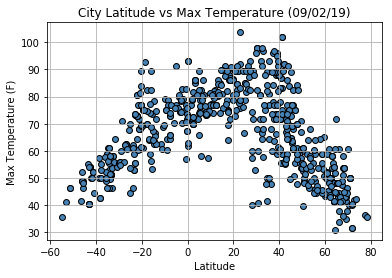

In [105]:
# Build a scatter plot for each data type
#plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")#this is not a dataframe

from datetime import datetime
import tzlocal  # $ pip install tzlocal

date=weather_df["date"]
print(date[0])
unix_timestamp = float(date[0])
local_timezone = tzlocal.get_localzone() # get pytz timezone
local_time = datetime.fromtimestamp(unix_timestamp, local_timezone)
local_time_format = local_time.strftime("%m/%d/%y")
print(local_time_format)
title = "City Latitude vs Max Temperature (" + local_time_format + ")"
df.plot.scatter(x="lat",y="temp", c="steelblue",s=35, edgecolor="black")  #this uses a dataframe

# Incorporate the other graph properties
plt.title(title)

plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("MaxTemperatureInWorldCities.png")

# Show plot
plt.show()

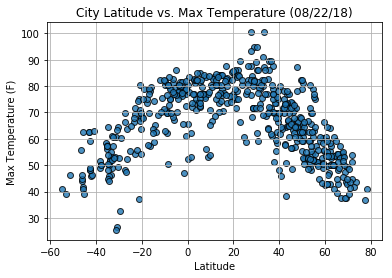

#### Latitude vs. Humidity Plot

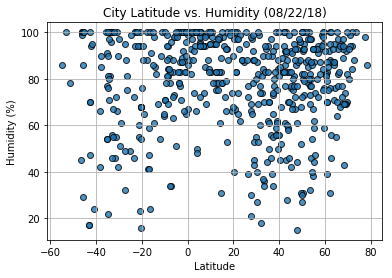

#### Latitude vs. Cloudiness Plot

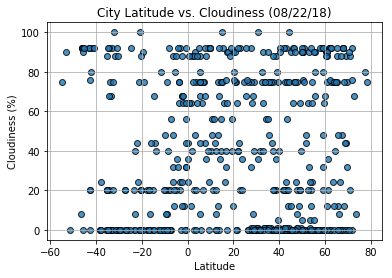

#### Latitude vs. Wind Speed Plot

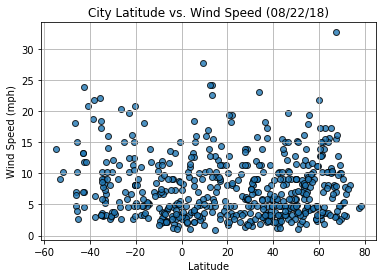